In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV

<Axes: >

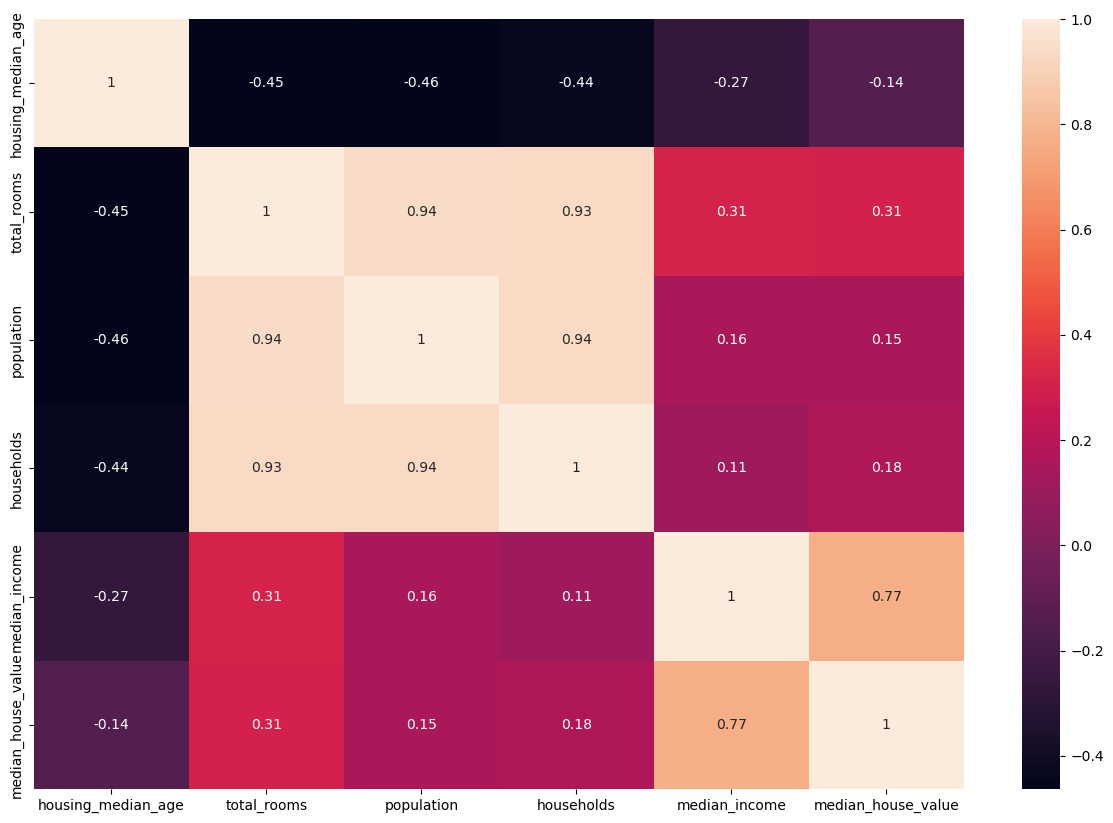

In [2]:
# Read the data
data1 = pd.read_csv('California_Housing_Data_Part1.csv')

# Standardize the data
scaler = StandardScaler()
data1[data1.columns] = scaler.fit_transform(data1[data1.columns])

# Correlation Matrix Plot
plt.figure(figsize=(15,10))

corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True)

In [3]:
# Create Test-Train Data
training_data, testing_data = train_test_split(data1, test_size=0.6, shuffle=False) 

# Setting OLS Model
independent_features = ['housing_median_age', 'total_rooms', 'population', 'households', 'median_income']

In [4]:
# OLS Model
model1 = LinearRegression()
fitted_model = model1.fit(training_data[independent_features], training_data['median_house_value'])

# Predict and calculate MSE for OLS
predict_values = fitted_model.predict(testing_data[independent_features])
original_values = testing_data['median_house_value']

score = mean_squared_error(predict_values, original_values)
print(f'Mean Squared Error for OLS - {score}')
print(f'Coefficient Values - {fitted_model.coef_}')

Mean Squared Error for OLS - 0.4642374823284958
Coefficient Values - [ 0.02721331  0.42405451 -0.89641059  0.60650643  0.70075205]


In [5]:
# Switch to ElasticNet Model
model2 = ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], l1_ratio=[.01, .1, .5, .9, .99], cv=10)
fitted_model1 = model2.fit(training_data[independent_features], training_data['median_house_value'])

# Predict and calculate MSE for ElasticNet
predict_values = fitted_model1.predict(testing_data[independent_features])
original_values = testing_data['median_house_value']

score = mean_squared_error(predict_values, original_values)
print(f'Mean Squared Error for ElasticNet - {score}')
print(f'Coefficient Values - {fitted_model1.coef_}')
print(f'Alpha Value Used - {fitted_model1.alpha_}')
print(f'L1_Ratio Used - {fitted_model1.l1_ratio_}')

Mean Squared Error for ElasticNet - 0.4483703122029226
Coefficient Values - [ 0.02208586  0.34797102 -0.71195232  0.52185388  0.71039459]
Alpha Value Used - 0.01
L1_Ratio Used - 0.01


In [17]:
# Generate ElasticNet Model with specific alpha and l1_ratio
model2 = ElasticNetCV(alphas=[10, 100], l1_ratio=[.01, .1, .5, .9, .99], cv=10)
fitted_model1 = model2.fit(training_data[independent_features], training_data['median_house_value'])
fitted_model1.coef_

# Predict and calculate MSE for Lasso
predict_values = fitted_model1.predict(testing_data[independent_features])
original_values = testing_data['median_house_value']

score = mean_squared_error(predict_values, original_values)
print(f'Mean Squared Error for ElasticNet - {score}')
print(f'Coefficient Values - {fitted_model1.coef_}')
print(f'Alpha Value Used - {fitted_model1.alpha_}')
print(f'L1_Ratio Used - {fitted_model1.l1_ratio_}')

Mean Squared Error for ElasticNet - 1.1843617687827366
Coefficient Values - [-0.          0.01059069  0.          0.00524009  0.05830727]
Alpha Value Used - 10
L1_Ratio Used - 0.01
